In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import LinRegAC.utilsAC as utilsAC
import LinRegAC.linRegAC as linRegAC
import LinRegAC.crossValdAC as crossValdAC

In [2]:
CH_dataCols = ['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
CHdata = pd.read_csv('computer_hardware/machine.data', names=CH_dataCols)
CHdata

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [3]:
CHdata_x = CHdata[CHdata.columns[2:-2]]
CHdata_y = CHdata[CHdata.columns[-2]]

In [4]:
train_x, train_y, test_x, test_y = utilsAC.splitTrainTest(CHdata_x, CHdata_y, 0.8)

In [5]:
train_x, train_min, train_max = utilsAC.normMinMax(train_x, mode='train')
test_x = utilsAC.normMinMax(test_x, mode='test', train_min=train_min, train_max=train_max)

## Direct Method

In [6]:
linReg1 = linRegAC.LinReg(mode=1)
linReg1.fit(train_x, train_y)
pred1 = linReg1.predict(test_x)
print(f'MSE: {utilsAC.getMse(test_y, pred1)}, RMSE: {utilsAC.getRmse(test_y, pred1)}')

Fitting completed.
Mode = 1, using Normal equation w = (X^T X)^-1 X^T y

MSE: 4631.023862193675, RMSE: 68.0516264478203


## Cross-validation Techniques

In [7]:
lrs = [0.01, 0.005, 0.003, 0.001]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'violet', 'purple']

### Holdout Method with Batch Gradient Descent

In [8]:
hld_cv = crossValdAC.CrossVald(option='holdout')
gd_hld_train_costs, gd_hld_opt_model = hld_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing Holdout Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 64.0617
Iteration  200 | Loss = 63.4812
Iteration  300 | Loss = 63.3363
Iteration  400 | Loss = 63.2906
Iteration  500 | Loss = 63.2750
Iteration  600 | Loss = 63.2696
Iteration  700 | Loss = 63.2676
Iteration  800 | Loss = 63.2669
Iteration  900 | Loss = 63.2667
Iteration 1000 | Loss = 63.2666
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2549.9978124598097, RMSE: 50.4975030319303
----------------- lr : 0.005 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 61.8263
Iteration  200 | Loss = 60.4023
Iteration  300 | Loss = 60.1296
Iteration  400 | Loss = 60.0335
Iteration  500 | Loss = 59.9954
Iteration  600 | Loss = 59.9797
Iteration  700 | Loss = 59.9732
Iteration  800 | Loss = 59.9704
Iteration  900 | Loss = 59.9692
Iteration 1000 | Loss = 59.9687
Fitting 

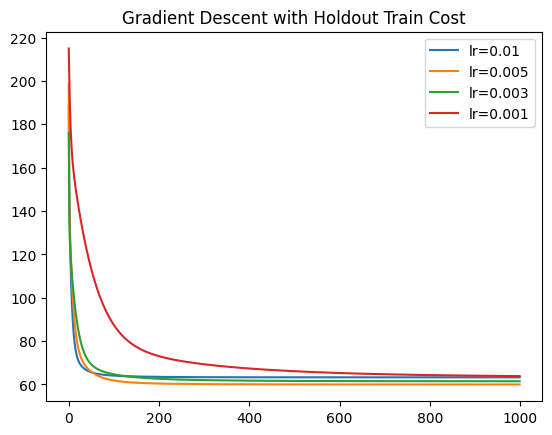

In [9]:
fig = plt.figure()
for i in range(len(gd_hld_train_costs)):
    plt.plot(gd_hld_train_costs[i], label=f'lr={lrs[i]}')
plt.legend()
plt.title('Gradient Descent with Holdout Train Cost')
plt.show()
fig.savefig('plots/gd_hld.png')

In [10]:
print(gd_hld_opt_model)

{'rmse': 50.4975030319303, 'lr': 0.01, 'w': array([-48.18224184,  66.73133822, 454.73386883, 379.11296816,
       216.90202372, -15.09459368, 187.62332624])}


### Holdout Method with Stochastic Gradient Descent

In [11]:
sgd_hld_train_costs, sgd_hld_opt_model = hld_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing Holdout Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 57.5271
Iteration  200 | Loss = 56.9529
Iteration  300 | Loss = 56.9125
Iteration  400 | Loss = 56.9082
Iteration  500 | Loss = 56.9073
Iteration  600 | Loss = 56.9071
Iteration  700 | Loss = 56.9070
Iteration  800 | Loss = 56.9069
Iteration  900 | Loss = 56.9069
Iteration 1000 | Loss = 56.9069
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 5708.900332223174, RMSE: 75.55726525108736
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 65.5193
Iteration  200 | Loss = 63.3081
Iteration  300 | Loss = 62.7781
Iteration  400 | Loss = 62.5613
Iteration  500 | Loss = 62.4459
Iteration  600 | Loss = 62.3770
Iteration  700 | Loss = 62.3337
Iteration  800 | Loss = 62.3058
Iteration  900 | Loss = 62.2877
Iteration 1000 | Loss = 62.275

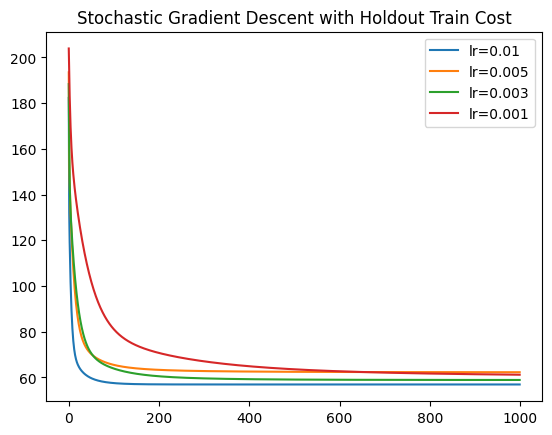

In [12]:
fig = plt.figure()
for i in range(len(sgd_hld_train_costs)):
    plt.plot(sgd_hld_train_costs[i], label=f'lr={lrs[i]}')
plt.legend()
plt.title('Stochastic Gradient Descent with Holdout Train Cost')
plt.show()
fig.savefig('plots/sgd_hld.png')

In [13]:
print(sgd_hld_opt_model)

{'rmse': 50.85690257506868, 'lr': 0.005, 'w': array([-49.49437796,  64.88075782, 466.2646472 , 363.4460685 ,
       172.07591457, -19.6840092 , 271.08637727])}


### Monte Carlo Cross-Validation with Batch Gradient Descent

In [14]:
montc_cv = crossValdAC.CrossVald(option='monte_carlo', monte_carlo=5)
gd_montc_train_costs, gd_montc_opt_model = montc_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing Monte Carlo Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 60.1156
Iteration  200 | Loss = 59.1884
Iteration  300 | Loss = 58.8894
Iteration  400 | Loss = 58.7690
Iteration  500 | Loss = 58.7200
Iteration  600 | Loss = 58.7000
Iteration  700 | Loss = 58.6919
Iteration  800 | Loss = 58.6886
Iteration  900 | Loss = 58.6872
Iteration 1000 | Loss = 58.6867
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 4197.07911726487, RMSE: 64.78486796517278
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 52.0580
Iteration  200 | Loss = 51.1907
Iteration  300 | Loss = 50.9135
Iteration  400 | Loss = 50.8127
Iteration  500 | Loss = 50.7758
Iteration  600 | Loss = 50.7624
Iteration  700 | Loss = 50.7574
Iteration  800 | Loss = 50.7556
Iteration  900 | Loss = 50.7550
Iteration 1000 | Loss = 50.7547
Fittin

In [15]:
print(gd_montc_opt_model)

{'rmse': 59.873648351501814, 'lr': 0.003, 'w': array([-63.4667493 ,  84.61909409, 517.92243233, 413.32519186,
        73.57662107, -12.80290787, 279.01490329])}


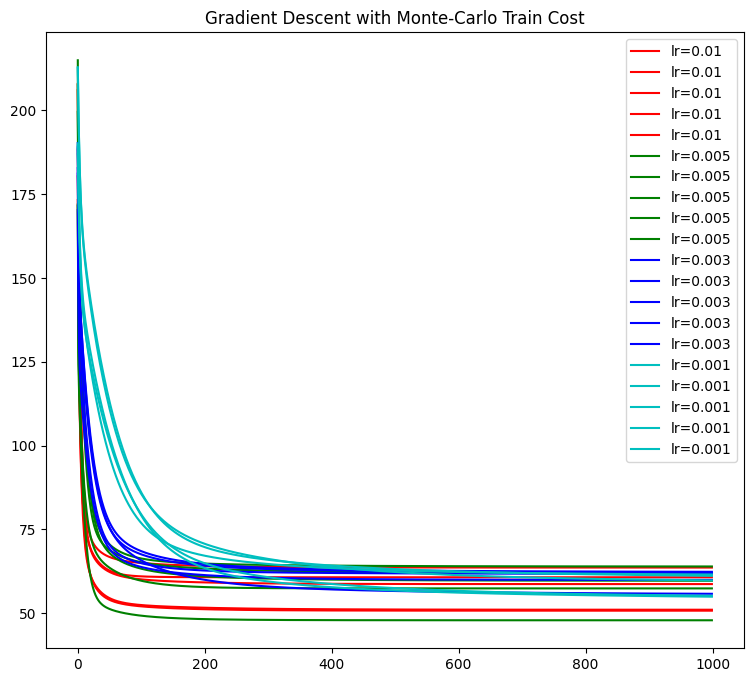

In [16]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(gd_montc_train_costs)):
    for j in range(len(gd_montc_train_costs[i])):
        plt.plot(gd_montc_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Gradient Descent with Monte-Carlo Train Cost')
plt.show()
fig.savefig('plots/gd_montc.png')

### Monte Carlo Cross-Validation with Stochastic Gradient Descent

In [17]:
sgd_montc_train_costs, sgd_montc_opt_model = montc_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing Monte Carlo Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 58.1853
Iteration  200 | Loss = 56.9930
Iteration  300 | Loss = 56.6275
Iteration  400 | Loss = 56.4940
Iteration  500 | Loss = 56.4442
Iteration  600 | Loss = 56.4257
Iteration  700 | Loss = 56.4188
Iteration  800 | Loss = 56.4163
Iteration  900 | Loss = 56.4154
Iteration 1000 | Loss = 56.4151
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 4671.345729361203, RMSE: 68.34724375833456
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 63.2678
Iteration  200 | Loss = 62.2392
Iteration  300 | Loss = 61.9344
Iteration  400 | Loss = 61.8324
Iteration  500 | Loss = 61.7970
Iteration  600 | Loss = 61.7846
Iteration  700 | Loss = 61.7800
Iteration  800 | Loss = 61.7784
Iteration  900 | Loss = 61.7777
Iteration 1000 | Loss = 61.

In [18]:
print(sgd_montc_opt_model)

{'rmse': 63.48264048779301, 'lr': 0.001, 'w': array([-53.11721196,  69.09127651, 381.09477042, 425.26337391,
       153.05597451,  75.02235524, 165.73353532])}


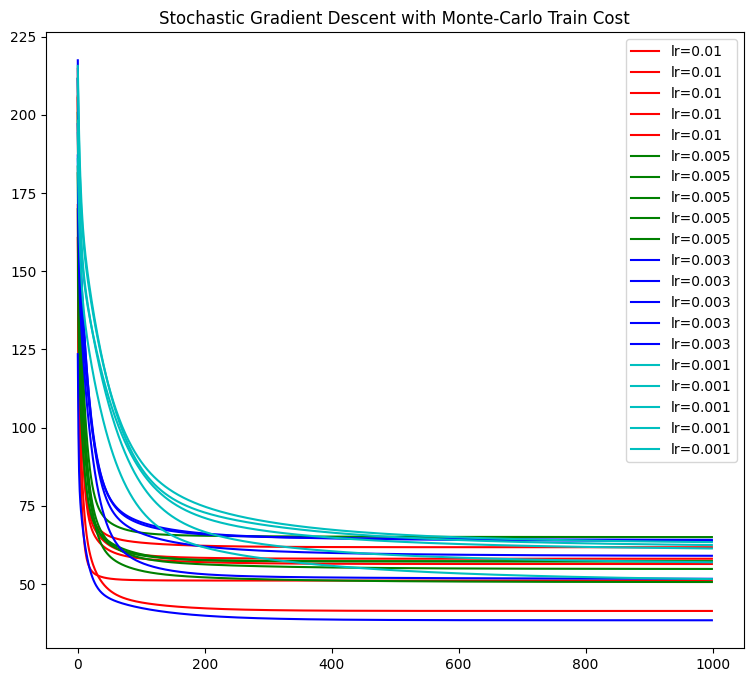

In [19]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(sgd_montc_train_costs)):
    for j in range(len(sgd_montc_train_costs[i])):
        plt.plot(sgd_montc_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Stochastic Gradient Descent with Monte-Carlo Train Cost')
plt.show()
fig.savefig('plots/sgd_montc.png')

### K-Fold Cross-Validation with Batch Gradient Descent

In [20]:
kfold_cv = crossValdAC.CrossVald(option='k_fold', k_fold=6)
gd_kfold_train_costs, gd_kfold_opt_model = kfold_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing K-Fold Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 51.1157
Iteration  200 | Loss = 50.3602
Iteration  300 | Loss = 50.1878
Iteration  400 | Loss = 50.1433
Iteration  500 | Loss = 50.1317
Iteration  600 | Loss = 50.1287
Iteration  700 | Loss = 50.1279
Iteration  800 | Loss = 50.1277
Iteration  900 | Loss = 50.1276
Iteration 1000 | Loss = 50.1276
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 10545.877159597561, RMSE: 102.69312128666438
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 58.9828
Iteration  200 | Loss = 58.2610
Iteration  300 | Loss = 58.1051
Iteration  400 | Loss = 58.0635
Iteration  500 | Loss = 58.0521
Iteration  600 | Loss = 58.0489
Iteration  700 | Loss = 58.0480
Iteration  800 | Loss = 58.0478
Iteration  900 | Loss = 58.0477
Iteration 1000 | Loss = 58.0477
Fitting 

/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exc

Iteration  700 | Loss = 61.6517
Iteration  800 | Loss = 61.6516
Iteration  900 | Loss = 61.6516
Iteration 1000 | Loss = 61.6516
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 1973.8374987656439, RMSE: 44.42789100065008
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 62.3573
Iteration  200 | Loss = 61.5382
Iteration  300 | Loss = 61.3284
Iteration  400 | Loss = 61.2666
Iteration  500 | Loss = 61.2481
Iteration  600 | Loss = 61.2426
Iteration  700 | Loss = 61.2409
Iteration  800 | Loss = 61.2404
Iteration  900 | Loss = 61.2403
Iteration 1000 | Loss = 61.2402
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2282.8818561204203, RMSE: 47.77951293305971
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 61.3958
Iteration  200 | Loss = 60.9061
Iteration  300 | Loss = 60.7

/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exc

Iteration  500 | Loss = 57.2636
Iteration  600 | Loss = 57.1859
Iteration  700 | Loss = 57.1448
Iteration  800 | Loss = 57.1230
Iteration  900 | Loss = 57.1114
Iteration 1000 | Loss = 57.1052
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 4791.72135651733, RMSE: 69.22226055624975
----------------- lr : 0.005 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 59.5861
Iteration  200 | Loss = 58.3675
Iteration  300 | Loss = 57.9883
Iteration  400 | Loss = 57.8085
Iteration  500 | Loss = 57.7122
Iteration  600 | Loss = 57.6586
Iteration  700 | Loss = 57.6284
Iteration  800 | Loss = 57.6113
Iteration  900 | Loss = 57.6017
Iteration 1000 | Loss = 57.5962
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 5036.09491894706, RMSE: 70.96544876872872
----------------- lr : 0.005 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 63.133

/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exc

Iteration  300 | Loss = 63.2477
Iteration  400 | Loss = 63.0718
Iteration  500 | Loss = 62.9847
Iteration  600 | Loss = 62.9390
Iteration  700 | Loss = 62.9146
Iteration  800 | Loss = 62.9014
Iteration  900 | Loss = 62.8942
Iteration 1000 | Loss = 62.8903
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 1492.864530779078, RMSE: 38.6376051377292
----------------- lr : 0.003 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 61.4767
Iteration  200 | Loss = 59.1279
Iteration  300 | Loss = 58.5004
Iteration  400 | Loss = 58.2892
Iteration  500 | Loss = 58.2094
Iteration  600 | Loss = 58.1777
Iteration  700 | Loss = 58.1648
Iteration  800 | Loss = 58.1594
Iteration  900 | Loss = 58.1571
Iteration 1000 | Loss = 58.1562
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 4995.449528861667, RMSE: 70.67849410437144
----------------- lr : 0.003 -----------------
Im

/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exc

Iteration 1000 | Loss = 44.6728
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 12793.077916466484, RMSE: 113.10648927655072
----------------- lr : 0.003 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 65.0519
Iteration  200 | Loss = 61.3874
Iteration  300 | Loss = 60.3658
Iteration  400 | Loss = 59.9714
Iteration  500 | Loss = 59.7708
Iteration  600 | Loss = 59.6527
Iteration  700 | Loss = 59.5784
Iteration  800 | Loss = 59.5303
Iteration  900 | Loss = 59.4987
Iteration 1000 | Loss = 59.4778
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3856.7615395490584, RMSE: 62.10283036665123
----------------- lr : 0.003 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 65.4961
Iteration  200 | Loss = 62.7100
Iteration  300 | Loss = 61.9401
Iteration  400 | Loss = 61.5727
Iteration  500 | Loss = 61.3432
Iteration  600 | Loss = 6

/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exc

Iteration  500 | Loss = 47.7721
Iteration  600 | Loss = 47.1578
Iteration  700 | Loss = 46.7603
Iteration  800 | Loss = 46.4796
Iteration  900 | Loss = 46.2655
Iteration 1000 | Loss = 46.0924
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 19180.120118397135, RMSE: 138.49231068329078
----------------- lr : 0.001 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 82.0448
Iteration  200 | Loss = 69.9717
Iteration  300 | Loss = 67.1612
Iteration  400 | Loss = 65.8177
Iteration  500 | Loss = 65.0105
Iteration  600 | Loss = 64.4918
Iteration  700 | Loss = 64.1414
Iteration  800 | Loss = 63.8926
Iteration  900 | Loss = 63.7074
Iteration 1000 | Loss = 63.5636
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 1181.647972127154, RMSE: 34.37510686713794
----------------- lr : 0.001 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 81

/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)
/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exc

Iteration  100 | Loss = 82.4167
Iteration  200 | Loss = 71.1189
Iteration  300 | Loss = 67.9327
Iteration  400 | Loss = 66.3104
Iteration  500 | Loss = 65.3544
Iteration  600 | Loss = 64.7547
Iteration  700 | Loss = 64.3572
Iteration  800 | Loss = 64.0796
Iteration  900 | Loss = 63.8764
Iteration 1000 | Loss = 63.7216
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 939.8375396193778, RMSE: 30.656769882350257
----------------- lr : 0.001 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 80.1725
Iteration  200 | Loss = 67.0137
Iteration  300 | Loss = 63.3953
Iteration  400 | Loss = 61.6446
Iteration  500 | Loss = 60.6413
Iteration  600 | Loss = 60.0134
Iteration  700 | Loss = 59.5882
Iteration  800 | Loss = 59.2795
Iteration  900 | Loss = 59.0426
Iteration 1000 | Loss = 58.8535
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 4160.691485218996, RMSE: 6

In [21]:
print(gd_kfold_opt_model)

{'rmse': 63.17163144345677, 'lr': 0.003, 'w': array([-55.53579409,  73.50272495, 464.00092856, 369.47146972,
       145.48715702,  -9.68945533, 301.96494667])}


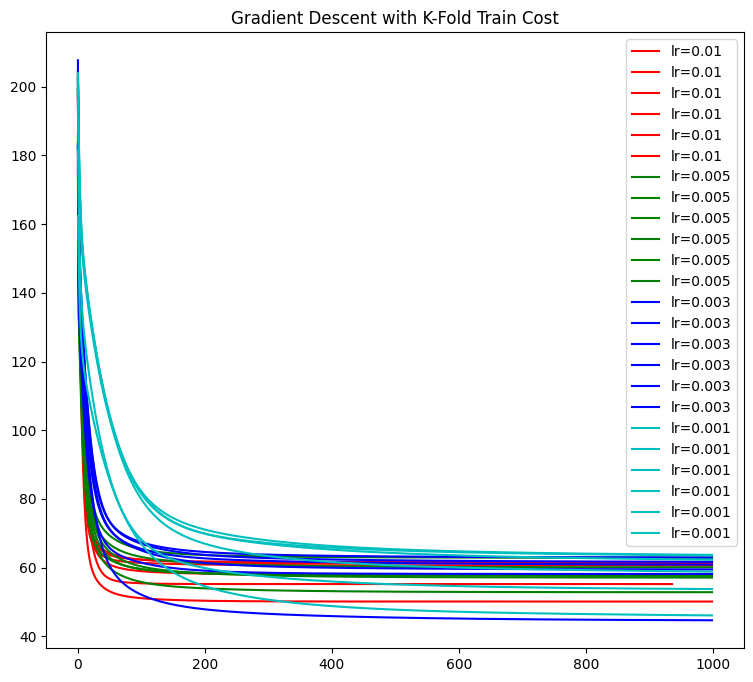

In [22]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(gd_kfold_train_costs)):
    for j in range(len(gd_kfold_train_costs[i])):
        plt.plot(gd_kfold_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Gradient Descent with K-Fold Train Cost')
plt.show()
fig.savefig('plots/gd_kfold.png')

### K-Fold Cross-Validation with Stochastic Gradient Descent

In [23]:
sgd_kfold_train_costs, sgd_kfold_opt_model = kfold_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing K-Fold Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 62.9229
Iteration  200 | Loss = 62.4590
Iteration  300 | Loss = 62.3171


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  400 | Loss = 62.2674
Iteration  500 | Loss = 62.2489
Iteration  600 | Loss = 62.2415
Iteration  700 | Loss = 62.2383
Iteration  800 | Loss = 62.2368
Iteration  900 | Loss = 62.2361
Iteration 1000 | Loss = 62.2357
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2097.450441323951, RMSE: 45.797930535385014
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 55.6325


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  200 | Loss = 54.6276
Iteration  300 | Loss = 54.4108
Iteration  400 | Loss = 54.3528
Iteration  500 | Loss = 54.3360
Iteration  600 | Loss = 54.3307
Iteration  700 | Loss = 54.3288
Iteration  800 | Loss = 54.3281
Iteration  900 | Loss = 54.3278
Iteration 1000 | Loss = 54.3277
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 6416.273382828977, RMSE: 80.10164407069918
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 53.5729
Iteration  200 | Loss = 52.8400
Iteration  300 | Loss = 52.6435


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  400 | Loss = 52.5861
Iteration  500 | Loss = 52.5684
Iteration  600 | Loss = 52.5625
Iteration  700 | Loss = 52.5603
Iteration  800 | Loss = 52.5594
Iteration  900 | Loss = 52.5590
Iteration 1000 | Loss = 52.5589
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 9244.252398126722, RMSE: 96.14703530596626
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 53.6410


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  200 | Loss = 53.1453
Iteration  300 | Loss = 53.1108
Iteration  400 | Loss = 53.1075
Iteration  500 | Loss = 53.1069
Iteration  600 | Loss = 53.1068
Iteration  700 | Loss = 53.1067
Iteration  800 | Loss = 53.1067
Iteration  900 | Loss = 53.1067
Iteration 1000 | Loss = 53.1067
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 9065.951796220616, RMSE: 95.21529181922732
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 62.9661
Iteration  200 | Loss = 62.3255
Iteration  300 | Loss = 62.1722


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  400 | Loss = 62.1288
Iteration  500 | Loss = 62.1155
Iteration  600 | Loss = 62.1111
Iteration  700 | Loss = 62.1095
Iteration  800 | Loss = 62.1088
Iteration  900 | Loss = 62.1085
Iteration 1000 | Loss = 62.1084
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 1566.0980145908743, RMSE: 39.57395626660133
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 63.8984


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  200 | Loss = 63.3018
Iteration  300 | Loss = 63.1616
Iteration  400 | Loss = 63.1194
Iteration  500 | Loss = 63.1055
Iteration  600 | Loss = 63.1005
Iteration  700 | Loss = 63.0985
Iteration  800 | Loss = 63.0976
Iteration  900 | Loss = 63.0972
Iteration 1000 | Loss = 63.0970
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 1382.0031781032853, RMSE: 37.1753033357266
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 62.0424
Iteration  200 | Loss = 60.2955
Iteration  300 | Loss = 59.8732


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  400 | Loss = 59.6981
Iteration  500 | Loss = 59.6142
Iteration  600 | Loss = 59.5724
Iteration  700 | Loss = 59.5512
Iteration  800 | Loss = 59.5405
Iteration  900 | Loss = 59.5350
Iteration 1000 | Loss = 59.5323
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3546.121193857569, RMSE: 59.549317324865854
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 50.9377


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  200 | Loss = 49.1978
Iteration  300 | Loss = 48.7054
Iteration  400 | Loss = 48.4655
Iteration  500 | Loss = 48.3342
Iteration  600 | Loss = 48.2608
Iteration  700 | Loss = 48.2196
Iteration  800 | Loss = 48.1964
Iteration  900 | Loss = 48.1834
Iteration 1000 | Loss = 48.1761
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 11019.379202436457, RMSE: 104.97323088500447
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 62.9962
Iteration  200 | Loss = 61.2387
Iteration  300 | Loss = 60.7342


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  400 | Loss = 60.5058
Iteration  500 | Loss = 60.3917
Iteration  600 | Loss = 60.3330
Iteration  700 | Loss = 60.3025
Iteration  800 | Loss = 60.2867
Iteration  900 | Loss = 60.2785
Iteration 1000 | Loss = 60.2744
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2921.3854339887334, RMSE: 54.04984212732479
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 59.8154


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  200 | Loss = 58.7854
Iteration  300 | Loss = 58.6039
Iteration  400 | Loss = 58.5620
Iteration  500 | Loss = 58.5522
Iteration  600 | Loss = 58.5500
Iteration  700 | Loss = 58.5495
Iteration  800 | Loss = 58.5495
Iteration  900 | Loss = 58.5495
Iteration 1000 | Loss = 58.5496
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 5303.5991279597665, RMSE: 72.82581361000896
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 63.6262
Iteration  200 | Loss = 61.9727
Iteration  300 | Loss = 61.5885


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  400 | Loss = 61.4434
Iteration  500 | Loss = 61.3792
Iteration  600 | Loss = 61.3491
Iteration  700 | Loss = 61.3345
Iteration  800 | Loss = 61.3275
Iteration  900 | Loss = 61.3240
Iteration 1000 | Loss = 61.3223
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2209.6012643555737, RMSE: 47.006395994115245
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 63.6415
Iteration  200 | Loss = 61.8863


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  300 | Loss = 61.2097
Iteration  400 | Loss = 60.8547
Iteration  500 | Loss = 60.6622
Iteration  600 | Loss = 60.5570
Iteration  700 | Loss = 60.4992
Iteration  800 | Loss = 60.4673
Iteration  900 | Loss = 60.4497
Iteration 1000 | Loss = 60.4399
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2966.5378895706494, RMSE: 54.46593329385488
----------------- lr : 0.003 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 65.3503


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  200 | Loss = 62.2210
Iteration  300 | Loss = 61.2822
Iteration  400 | Loss = 60.8409
Iteration  500 | Loss = 60.5870
Iteration  600 | Loss = 60.4291
Iteration  700 | Loss = 60.3274
Iteration  800 | Loss = 60.2608
Iteration  900 | Loss = 60.2167
Iteration 1000 | Loss = 60.1873
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3085.9532730004858, RMSE: 55.55135707613709
----------------- lr : 0.003 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 62.2613
Iteration  200 | Loss = 58.2090
Iteration  300 | Loss = 56.9715


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  400 | Loss = 56.4105
Iteration  500 | Loss = 56.0914
Iteration  600 | Loss = 55.8925
Iteration  700 | Loss = 55.7643
Iteration  800 | Loss = 55.6804
Iteration  900 | Loss = 55.6251
Iteration 1000 | Loss = 55.5885
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 6490.009322087816, RMSE: 80.56059410212796
----------------- lr : 0.003 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 65.4480


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  200 | Loss = 62.6102
Iteration  300 | Loss = 61.8052
Iteration  400 | Loss = 61.4505
Iteration  500 | Loss = 61.2517
Iteration  600 | Loss = 61.1270
Iteration  700 | Loss = 61.0444
Iteration  800 | Loss = 60.9882
Iteration  900 | Loss = 60.9494
Iteration 1000 | Loss = 60.9223
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2767.2491126700643, RMSE: 52.604649154519265
----------------- lr : 0.003 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 61.5247
Iteration  200 | Loss = 59.4518
Iteration  300 | Loss = 58.9366


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  400 | Loss = 58.7815
Iteration  500 | Loss = 58.7284
Iteration  600 | Loss = 58.7087
Iteration  700 | Loss = 58.7012
Iteration  800 | Loss = 58.6982
Iteration  900 | Loss = 58.6970
Iteration 1000 | Loss = 58.6966
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 4305.445975077245, RMSE: 65.61589727403904
----------------- lr : 0.003 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 57.3634
Iteration  200 | Loss = 54.3721


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  300 | Loss = 53.5339
Iteration  400 | Loss = 53.1012
Iteration  500 | Loss = 52.8221
Iteration  600 | Loss = 52.6322
Iteration  700 | Loss = 52.5016
Iteration  800 | Loss = 52.4115
Iteration  900 | Loss = 52.3494
Iteration 1000 | Loss = 52.3065
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 8594.20680736805, RMSE: 92.70494489167258
----------------- lr : 0.003 -----------------
Implementing Stochastic Gradient Descent.


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  100 | Loss = 64.8227
Iteration  200 | Loss = 62.0058
Iteration  300 | Loss = 61.4214
Iteration  400 | Loss = 61.1999
Iteration  500 | Loss = 61.0813
Iteration  600 | Loss = 61.0089
Iteration  700 | Loss = 60.9623
Iteration  800 | Loss = 60.9315
Iteration  900 | Loss = 60.9108
Iteration 1000 | Loss = 60.8967
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3150.462240550633, RMSE: 56.12897861667031
----------------- lr : 0.001 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 80.3830
Iteration  200 | Loss = 67.7862
Iteration  300 | Loss = 64.2309
Iteration  400 | Loss = 62.4551


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  500 | Loss = 61.4260
Iteration  600 | Loss = 60.7916
Iteration  700 | Loss = 60.3785
Iteration  800 | Loss = 60.0947
Iteration  900 | Loss = 59.8901
Iteration 1000 | Loss = 59.7363
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 3660.4806387840213, RMSE: 60.50190607562725
----------------- lr : 0.001 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 80.4173
Iteration  200 | Loss = 68.8386


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  300 | Loss = 65.9679
Iteration  400 | Loss = 64.5271
Iteration  500 | Loss = 63.6552
Iteration  600 | Loss = 63.0877
Iteration  700 | Loss = 62.6958
Iteration  800 | Loss = 62.4104
Iteration  900 | Loss = 62.1933
Iteration 1000 | Loss = 62.0225
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2396.199283895523, RMSE: 48.95098858956296
----------------- lr : 0.001 -----------------
Implementing Stochastic Gradient Descent.


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  100 | Loss = 80.4680
Iteration  200 | Loss = 68.1641
Iteration  300 | Loss = 65.1468
Iteration  400 | Loss = 63.8022
Iteration  500 | Loss = 63.0912
Iteration  600 | Loss = 62.6847
Iteration  700 | Loss = 62.4337
Iteration  800 | Loss = 62.2658
Iteration  900 | Loss = 62.1451
Iteration 1000 | Loss = 62.0530
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2743.3732024101423, RMSE: 52.377220262344416
----------------- lr : 0.001 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 81.9728
Iteration  200 | Loss = 70.2437


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  300 | Loss = 67.3636
Iteration  400 | Loss = 65.9065
Iteration  500 | Loss = 65.0165
Iteration  600 | Loss = 64.4451
Iteration  700 | Loss = 64.0638
Iteration  800 | Loss = 63.7990
Iteration  900 | Loss = 63.6077
Iteration 1000 | Loss = 63.4642
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 1243.6832526647627, RMSE: 35.26589361783936
----------------- lr : 0.001 -----------------
Implementing Stochastic Gradient Descent.


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  100 | Loss = 79.2625
Iteration  200 | Loss = 67.0360
Iteration  300 | Loss = 63.7394
Iteration  400 | Loss = 62.1812
Iteration  500 | Loss = 61.2549
Iteration  600 | Loss = 60.6395
Iteration  700 | Loss = 60.1934
Iteration  800 | Loss = 59.8465
Iteration  900 | Loss = 59.5622
Iteration 1000 | Loss = 59.3210
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 4115.363490574333, RMSE: 64.15109890387173
----------------- lr : 0.001 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 57.2849
Iteration  200 | Loss = 49.2984


/Users/abinashchetia/Desktop/lin_reg_ac/LinRegAC/crossValdAC.py:103: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  train_y = pd.concat([train_y, data_folds[j].iloc[:, -1]], axis=0)


Iteration  300 | Loss = 47.4931
Iteration  400 | Loss = 46.6318
Iteration  500 | Loss = 46.1312
Iteration  600 | Loss = 45.8238
Iteration  700 | Loss = 45.6278
Iteration  800 | Loss = 45.4988
Iteration  900 | Loss = 45.4115
Iteration 1000 | Loss = 45.3510
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 12330.708570466093, RMSE: 111.04372368786132


In [24]:
print(sgd_kfold_opt_model)

{'rmse': 62.048471856184506, 'lr': 0.001, 'w': array([-37.03516189,  46.82785056, 234.47751001, 299.15180225,
       119.99375942,  72.16995665, 157.21393931])}


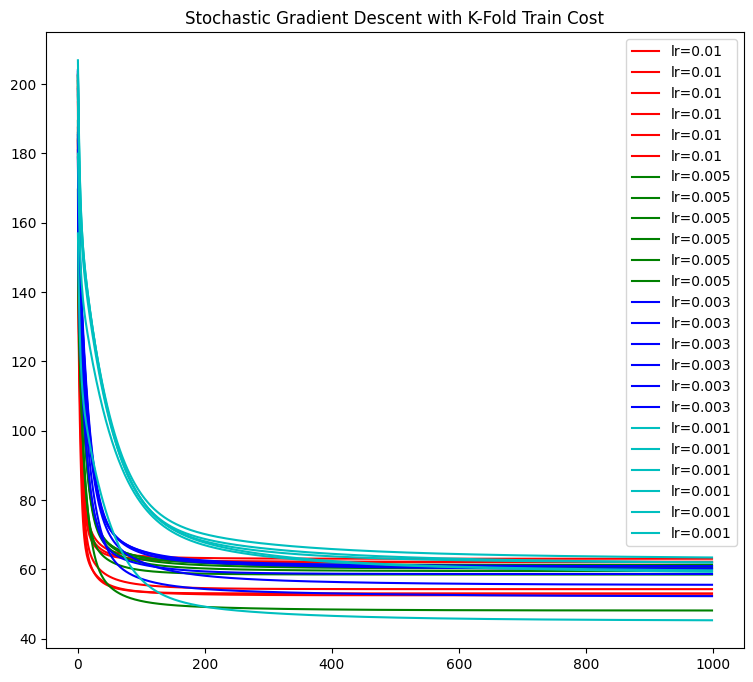

In [25]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(sgd_kfold_train_costs)):
    for j in range(len(sgd_kfold_train_costs[i])):
        plt.plot(sgd_kfold_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Stochastic Gradient Descent with K-Fold Train Cost')
plt.show()
fig.savefig('plots/sgd_kfold.png')